# 1. Functions

## imports

In [38]:
from PIL import Image
import matplotlib.pyplot as plt

## imOpen

In [39]:
def imOpen(imageFileName):
    originalImage = Image.open(imageFileName)
    width = originalImage.size[0]
    height = originalImage.size[1]
    image = Image.new('L', (width,height))
    for i in range(0, width):
        for j in range(0, height):
            r, g, b = originalImage.getpixel((i, j))
            color = 0.3 * r + 0.59 * g + 0.11 * b
            image.putpixel((i, j), int(color))
    
    return image

## toStrH

In [40]:
def toStrH(image):
    width = image.size[0]
    height = image.size[1]
    lineBreak = "\n"
    code = "H "
    code += "{} {}{}".format(width, height, lineBreak)

    for j in range(0, height):
        currentValue = -1
        startOfValue = -1
        endOfValue = -1
        for i in range(0, width):
            color = image.getpixel((i, j))
            if(currentValue != color):
                if(i != 0):
                    code += "{} {} {} ".format(currentValue, startOfValue, i - 1)
                currentValue = color
                startOfValue = i
        code += "{} {} {} ".format(currentValue, startOfValue, width - 1)
        code += lineBreak

    return code

## toStrV

In [41]:
def toStrV(image):
    width = image.size[0]
    height = image.size[1]
    lineBreak = "\n"
    code = "V "
    code += "{} {}{}".format(width, height, lineBreak)

    for i in range(0, width):
        currentValue = -1
        startOfValue = -1
        endOfValue = -1
        for j in range(0, height):
            color = image.getpixel((i, j))
            if(currentValue != color):
                if(j != 0):
                    code += "{} {} {} ".format(currentValue, startOfValue, j - 1)
                currentValue = color
                startOfValue = j
        code += "{} {} {} ".format(currentValue, startOfValue, height - 1)    
        code += lineBreak
            
    return code

## toFile

In [42]:
def toFile(fileName, runLengthCode):
    file = open(fileName, "w")
    file.writelines(runLengthCode)
    file.close()

## toImg

In [43]:
def toImg(fileName):
    file = open(fileName)
    fileText = file.read()
    file.close()
    fileTokens= fileText.split()
    runCodeDir = fileTokens[0]
    width = int(fileTokens[1])
    height = int(fileTokens[2])
    image = Image.new('L', (width,height))
    
    currentColorIndex = 3
    currentStartIndex = 4
    currentEndIndex = 5
    currentColor = int(fileTokens[currentColorIndex])
    currentStart = int(fileTokens[currentStartIndex])
    currentEnd = int(fileTokens[currentEndIndex])
    
    outer = -1
    inner = -1

    if(runCodeDir == "V"):
        outer = width
        inner = height
    
    if(runCodeDir == "H"):
        outer = height
        inner = width
    
    for j in range(0, outer):
            current = 0
            while(current < inner):
                for k in range(currentStart, currentEnd + 1):
                    if(runCodeDir == "V"):
                        image.putpixel((j, k), currentColor)
                    if(runCodeDir == "H"):
                        image.putpixel((k, j), currentColor)
                    current += 1

                currentColorIndex += 3
                currentStartIndex += 3
                currentEndIndex += 3

                if(currentColorIndex < len(fileTokens)):
                    currentColor = int(fileTokens[currentColorIndex])
                    currentStart = int(fileTokens[currentStartIndex])
                    currentEnd = int(fileTokens[currentEndIndex])

    plt.imshow(image, cmap="gray")        
                

# 2. Test

## Encoding

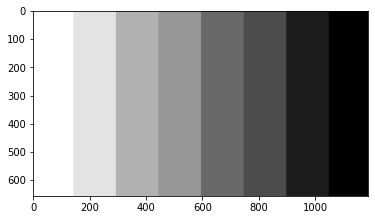

In [44]:
barsImage1 = imOpen("Inputs/Bars.bmp")
plt.imshow(barsImage1, cmap="gray")

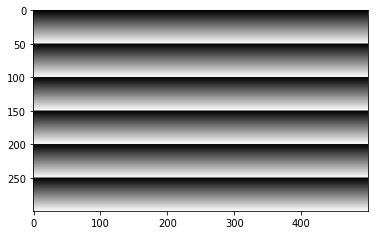

In [45]:
barsImage2 = imOpen("Inputs/Bars2.bmp")
plt.imshow(barsImage2, cmap="gray")

In [46]:
# Encoding first bars image
barsImage1H = toStrH(barsImage1)
barsImage1V = toStrV(barsImage1)
toFile("Outputs/H1.txt", barsImage1H)
toFile("Outputs/V1.txt", barsImage1V)

# Encoding second bars image
barsImage2H = toStrH(barsImage2)
barsImage2V = toStrV(barsImage2)
toFile("Outputs/H2.txt", barsImage2H)
toFile("Outputs/V2.txt", barsImage2V)

## Encoding Disscusion



## Results

In [47]:
print("Bars Image 1")
print("------------")
print("Horizontal RLE character count:", len(barsImage1H))
print("Vertical RLE character count:", len(barsImage1V))
print()
print("Bars Image 2")
print("------------")
print("Horizontal RLE character count:", len(barsImage2H))
print("Vertical RLE character count:", len(barsImage2V))

Bars Image 1
------------
Horizontal RLE character count: 238795
Vertical RLE character count: 12498

Bars Image 2
------------
Horizontal RLE character count: 3178
Vertical RLE character count: 1624510


## Comment

## Decoding

### Mystery

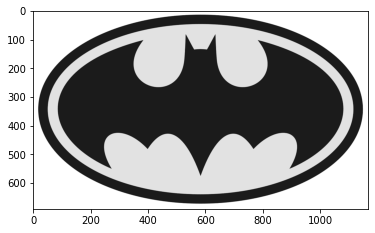

In [48]:
toImg("Inputs/Mystery1.txt")

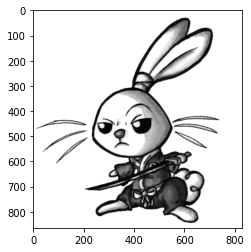

In [49]:
toImg("Inputs/Mystery2.txt")

### Bars

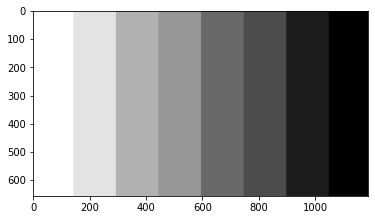

In [50]:
toImg("Outputs/H1.txt")

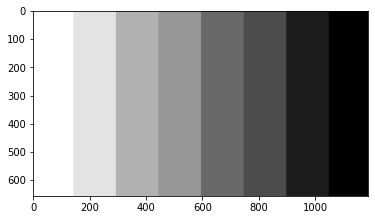

In [51]:
toImg("Outputs/V1.txt")

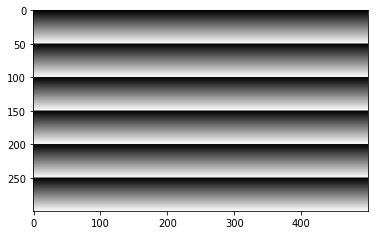

In [52]:
toImg("Outputs/H2.txt")

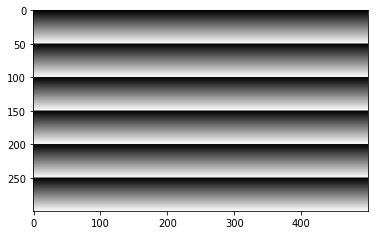

In [53]:
toImg("Outputs/V2.txt")